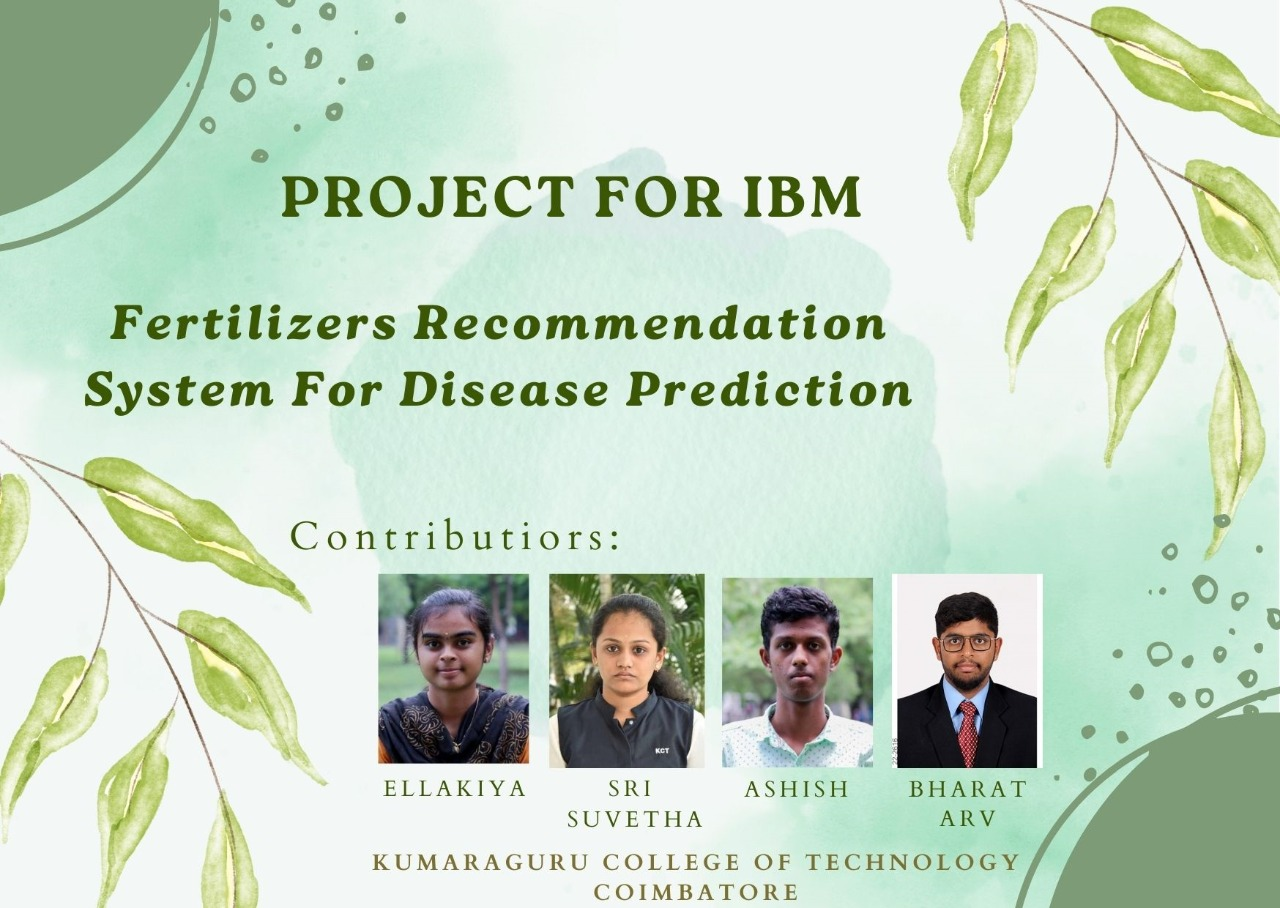

# ***📝 Assignment 4 ( SMS SPAM Classification )***

## **👥 Team ID : PNT2022TMID38633**

**🙂 Problem Statement :**
*Over recent years, as the popularity of mobile phone devices has increased, Short
Message Service (SMS) has grown into a multi-billion dollar industry. At the same time,
reduction in the cost of messaging services has resulted in growth in unsolicited
commercial advertisements (spams) being sent to mobile phones. Due to Spam SMS,
Mobile service providers suffer from some sort of financial problems as well as it reduces
calling time for users. Unfortunately, if the user accesses such Spam SMS they may face
the problem of virus or malware. When SMS arrives at mobile it will disturb mobile user
privacy and concentration. It may lead to frustration for the user. So Spam SMS is one of
the major issues in the wireless communication world and it grows day by day.*

**🔧 Perform the Below Tasks to complete the assignment**<br>
 *&nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Download the Dataset : [Dataset](https://www.kaggle.com/code/kredy10/simple-lstm-for-text-classification/data)<br>
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Import required library<br>
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Read dataset and do pre-processing<br>
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Create Model<br>
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Add Layers (LSTM, Dense-(Hidden Layers), Output)<br>
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Compile the Model<br>
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Fit the Model<br>
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Save The Model<br>
 &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp;● Test The Model<br>*

**⬇️ Importing Required Libraries**

In [ ]:
#import the library
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

**💽 Read Data And Pre-Processing**

In [ ]:
#load the dataset
df=pd.read_csv(r"spam.csv",encoding='Windows-1252')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


**🛠️Creating Model**

In [ ]:
ps=PorterStemmer()

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jijis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
data=[]
for i in range(0,5572):
    message=df["v2"][i]
    message=message.lower()
    message=re.sub('[^a-z]',' ',message)
    message=message.split()
    message=[ps.stem(word) for word in message if not word in set(stopwords.words("english"))]
    message=' '.join(message)
    data.append(message)

In [ ]:
data

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

**❇️ Adding Layers**

In [ ]:
cv=CountVectorizer(max_features=7000)
x=cv.fit_transform(data).toarray()
x.shape

(5572, 6221)

In [ ]:
df["v1"].loc[df["v1"]=="spam"]=0.0
df["v1"].loc[df["v1"]=="ham"]=1.0
df["v1"]

0       1.0
1       1.0
2       0.0
3       1.0
4       1.0
       ... 
5567    0.0
5568    1.0
5569    1.0
5570    1.0
5571    1.0
Name: v1, Length: 5572, dtype: object

In [ ]:
y=df.iloc[:,0:1].values
y=np.asarray(y).astype("float64")

In [ ]:
y

array([[1.],
       [1.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
#create model
model=Sequential()

In [ ]:
#input layer
model.add(Dense(units=5572,activation='relu',kernel_initializer='random_uniform'))
#hidden layer
model.add(Dense(units=6000,activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(units=6000,activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(units=6000,activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(units=6000,activation='relu',kernel_initializer='random_uniform'))
model.add(Dense(units=6000,activation='relu',kernel_initializer='random_uniform'))
#output layer
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='random_uniform'))

**🔁 Compile the Model**

In [ ]:
#Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**🧮 Fit the Model**

In [ ]:
# Fit the Model
tr=model.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
140/140 [==============================] - 273s 2s/step - loss: 1.9108 - accuracy: 0.9334
Epoch 2/10
140/140 [==============================] - 206s 1s/step - loss: 0.0236 - accuracy: 0.9946
Epoch 3/10
140/140 [==============================] - 200s 1s/step - loss: 4.3749e-05 - accuracy: 1.0000
Epoch 4/10
140/140 [==============================] - 203s 1s/step - loss: 7.6980e-07 - accuracy: 1.0000
Epoch 5/10
140/140 [==============================] - 207s 1s/step - loss: 3.5447e-07 - accuracy: 1.0000
Epoch 6/10
140/140 [==============================] - 211s 2s/step - loss: 2.0691e-07 - accuracy: 1.0000
Epoch 7/10
140/140 [==============================] - 218s 2s/step - loss: 1.1820e-07 - accuracy: 1.0000
Epoch 8/10
140/140 [==============================] - 213s 2s/step - loss: 7.1365e-08 - accuracy: 1.0000
Epoch 9/10
140/140 [==============================] - 206s 1s/step - loss: 4.6325e-08 - accuracy: 1.0000
Epoch 10/10
140/140 [==============================] - 207s 1s/

**💾 Save The Model**

In [ ]:
# Save The Model
model.save("sms.h5")

**🧪 Test The Model**

In [ ]:
# Test The Model
ypred=model.predict(x_test)
ypred

35/35 [==============================] - 99s 327ms/step


array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [ ]:
y_test

array([[1.],
       [1.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [ ]:
text=model.predict(cv.transform(["Wishing you a very happy Birthday to you ! "]))
text>0.5


1/1 [==============================] - 16s 16s/step


array([[ True]])

In [ ]:
class_name=["ham","spam"]
pred_id=text.argmax(axis=1)[0]
pred_id
print(str(class_name[pred_id]))

ham


**<--- ✅ End of the Assignment ✅--->**